In [1]:
import numpy as np
import pandas as pd# import the seaborn module
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load dataset
dataset = pd.read_csv('diamonds.csv')
dataset.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
dataset.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


Columns Metadata :

carat : berat diamond

cut : kualitas diamond

color : warna diamond

clarity : level kemurnian diamonds

depth : tinggi dari diamond tabel

table : lebar dari diamond tabel

price : harga diamond ($US)

x : panjang

y : lebar

z : kedalaaman


In [4]:
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


(53940, 11)

In [5]:
#find the correlations
correlations = dataset.corr(method='kendall')
correlations

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.135543,-0.032338,-0.080543,0.001983,-0.132850,-0.133234,-0.138432
carat,-0.135543,1.000000,0.019727,0.139149,0.834105,0.960602,0.957371,0.951233
depth,-0.032338,0.019727,1.000000,-0.178682,0.005750,-0.018134,-0.019530,0.070946
table,-0.080543,0.139149,-0.178682,1.000000,0.121704,0.143546,0.138722,0.112482
price,0.001983,0.834105,0.005750,0.121704,1.000000,0.830555,0.829333,0.819293
x,-0.132850,0.960602,-0.018134,0.143546,0.830555,1.000000,0.968242,0.912580
y,-0.133234,0.957371,-0.019530,0.138722,0.829333,0.968242,1.000000,0.911314
z,-0.138432,0.951233,0.070946,0.112482,0.819293,0.912580,0.911314,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

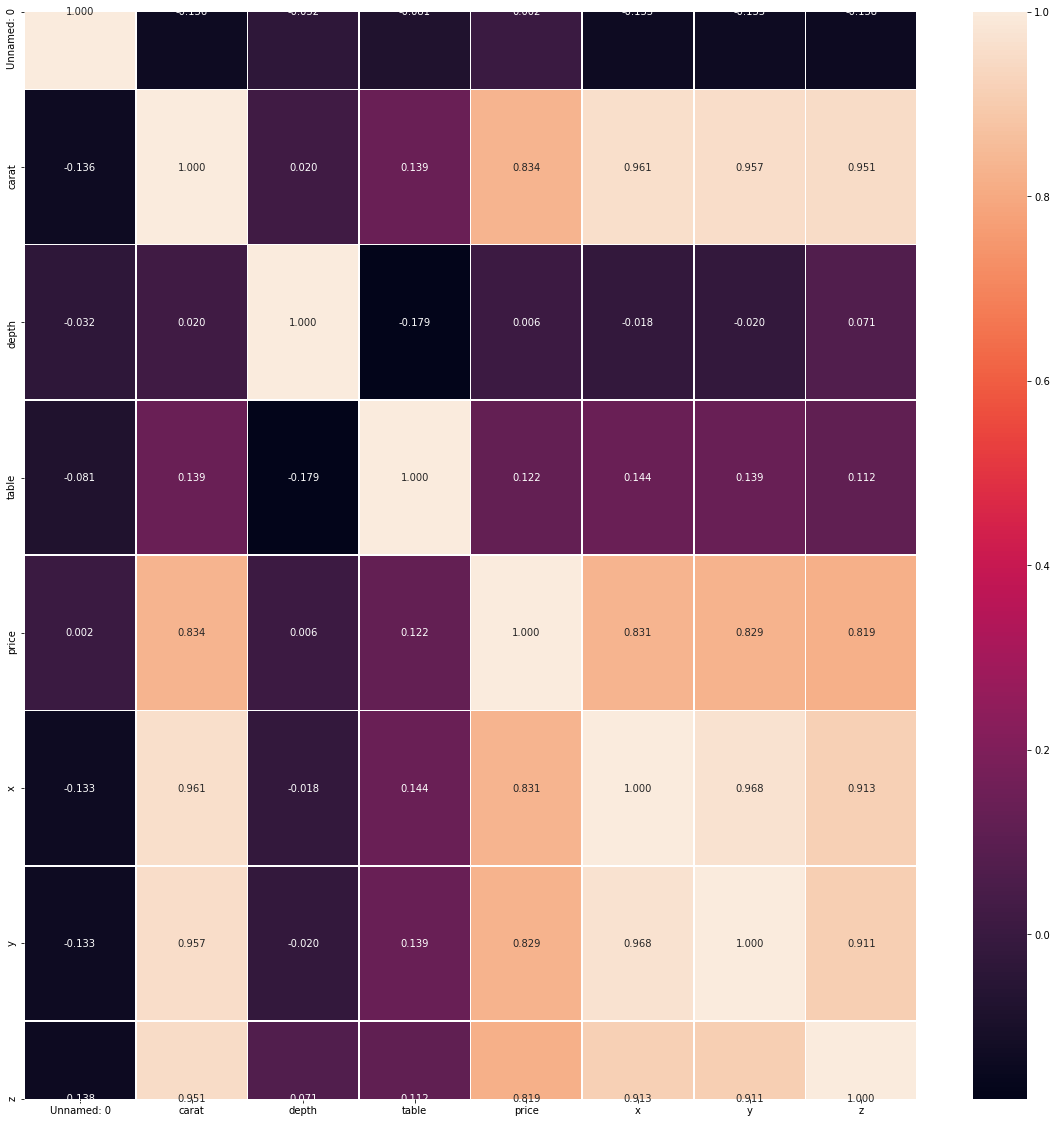

In [6]:
# correlation map
# higher correlations are brighter
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True, linewidths=.5, fmt='.3f', ax=ax)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

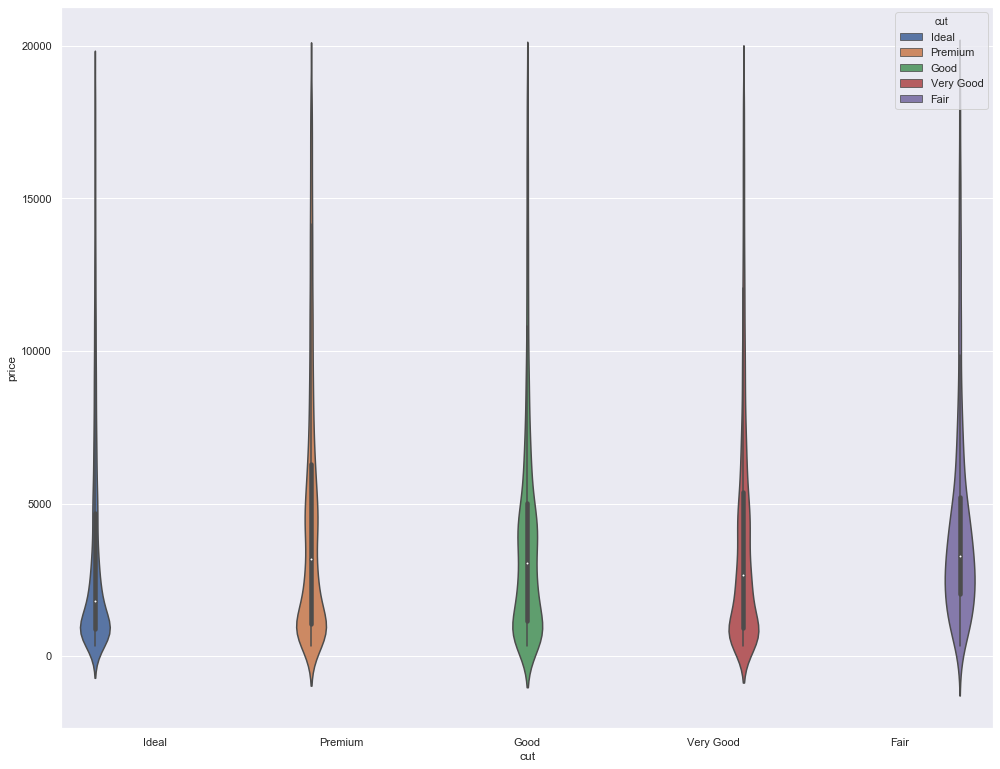

In [7]:
sns.set(rc={'figure.figsize':(16.7,13.27)})
sns.violinplot(x="cut",y="price", hue="cut", data=dataset);
plt.show

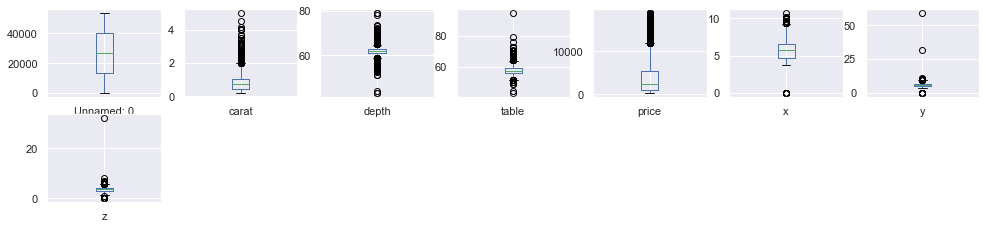

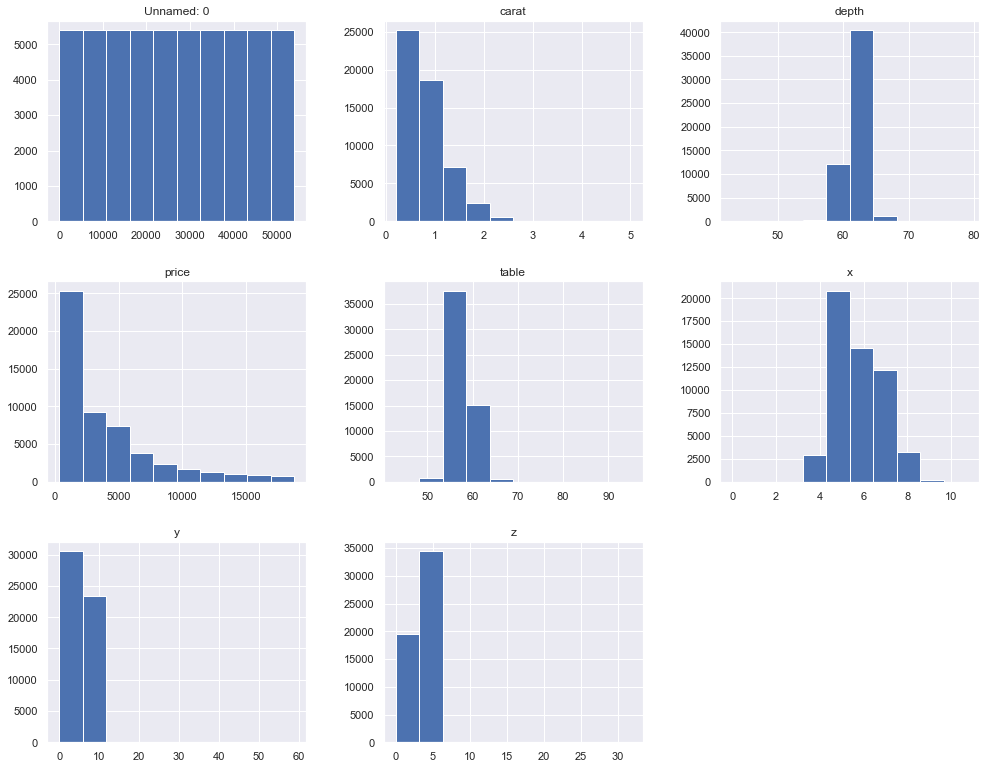

In [8]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(7,7), sharex=False, sharey=False)
plt.show()
# histograms
dataset.hist()
plt.show()

In [9]:
print("cut : ",dataset['cut'].unique())
print("color : ",dataset['color'].unique())
print("clarity : ",dataset['clarity'].unique())

cut :  ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color :  ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity :  ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [10]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
dataset['cut'] = le.fit_transform(dataset['cut'])
dataset['color'] = le.fit_transform(dataset['color'])
dataset['clarity'] = le.fit_transform(dataset['clarity'])
#display the initial records
dataset.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [11]:
# dropping the Unnamed :0 column
cols = [col for col in dataset.columns if col not in ['Unnamed: 0']]
data = dataset[cols]

# define the target
target = dataset['price']
data.head(n=2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31


In [12]:
#import the necessary module
from sklearn.model_selection import train_test_split
#split data set into train and test set 
data_train, data_test, target_train, target_test = train_test_split(dataset, target, test_size = 0.30, random_state = 10)

In [13]:
# import the necessary module
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

Naive-Bayes accuracy :  0.721480657520702
